In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [3]:
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
        'data/test1',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


predictions = emotion_model.predict(test_generator)

Found 7178 images belonging to 7 classes.
113/113 [==============================] - 59s 523ms/step


-----------------------------------------------------------------
[[ 16   0  25 358 100 303 156]
 [  1   0   2  46  15  32  15]
 [ 17   0  21 379 100 345 162]
 [ 24   0  53 673 187 590 247]
 [ 25   0  28 509 122 365 184]
 [ 26   0  36 458 137 414 176]
 [ 13   0  19 327  63 291 118]]


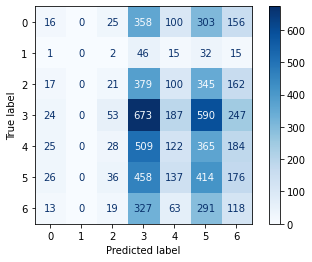

In [5]:
print("-----------------------------------------------------------------")
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [6]:
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.02      0.03       958
           1       0.00      0.00      0.00       111
           2       0.11      0.02      0.03      1024
           3       0.24      0.38      0.30      1774
           4       0.17      0.10      0.12      1233
           5       0.18      0.33      0.23      1247
           6       0.11      0.14      0.12       831

    accuracy                           0.19      7178
   macro avg       0.14      0.14      0.12      7178
weighted avg       0.17      0.19      0.16      7178



C:\Users\My PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\My PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\My PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
